# 使用Python进行图像特征提取

本notebook介绍使用Python进行图像特征提取的几种常用技术，包括归一化、边缘检测、图像滤波和直方图均衡化。

## 1. 图像预处理简介

图像预处理是根据需要对图像进行改变以进行进一步处理的过程。例如，对于二进制分类，灰度图像就足够了，但对于多类分类，将需要RGB图像。预处理的主要目的是:

*   降噪:使用各种降噪技术从图像中去除不需要的噪声。
*   对比度增强:提高对比度，使特征更加明显
*   归一化:将像素值缩放到标准范围。
*   调整大小和裁剪:调整图像大小，因为数据集中的某些图像将具有不同的大小。

## 2. 用于图像预处理的Python库

下面的Python库是常用的库:

*   OpenCV
*   pillow (PIL)
*   scikit-image
*   NumPy

In [5]:
# 导入必要的库
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

## 3. 基本图像操作

下面是使用Python的常见图像预处理技术。示例中我使用了一个名为 `1.jpeg` 的单一图像进行预处理，因为它可以清楚地显示每种技术的输出效果。

**请注意**: 你需要将名为 `1.jpeg` 的图像文件放到当前目录下，才能运行以下代码。

In [1]:
!wget https://github.com/wkwbk/ipynb/raw/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E5%AE%9E%E9%AA%8C%E6%8A%A5%E5%91%8A/%E5%AE%9E%E9%AA%8C%E4%BA%8C/1.jpeg

--2025-04-20 05:48:51--  https://github.com/wkwbk/ipynb/raw/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E5%AE%9E%E9%AA%8C%E6%8A%A5%E5%91%8A/%E5%AE%9E%E9%AA%8C%E4%BA%8C/1.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wkwbk/ipynb/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E5%AE%9E%E9%AA%8C%E6%8A%A5%E5%91%8A/%E5%AE%9E%E9%AA%8C%E4%BA%8C/1.jpeg [following]
--2025-04-20 05:48:51--  https://raw.githubusercontent.com/wkwbk/ipynb/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E5%AE%9E%E9%AA%8C%E6%8A%A5%E5%91%8A/%E5%AE%9E%E9%AA%8C%E4%BA%8C/1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 651971 (6

- a. 加载和显示图像

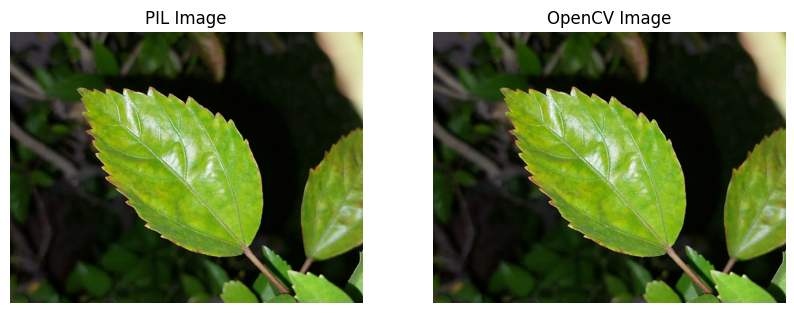

In [6]:
# Load an image using PIL
try:
    image1 = Image.open('1.jpeg')
    #Load the same image using open-cv
    image = cv2.imread('1.jpeg')

    # Display the image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.title('PIL Image')
    plt.axis('off')  # Hide axis

    plt.subplot(1, 2, 2)
    # OpenCV读取的图像是BGR格式，需要转换为RGB格式才能正确显示
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('OpenCV Image')
    plt.axis('off')  # Hide axis

    plt.show()

except FileNotFoundError:
    print("Error: The image file '1.jpeg' was not found.  Make sure it is in the current directory.")

- b. 调整图像大小

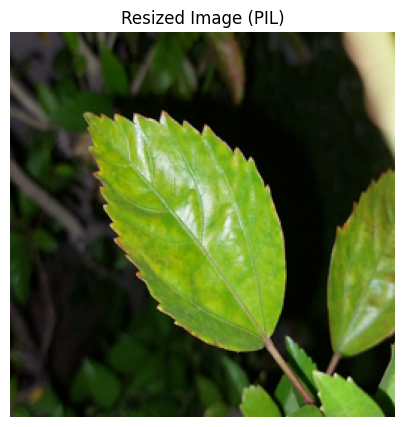

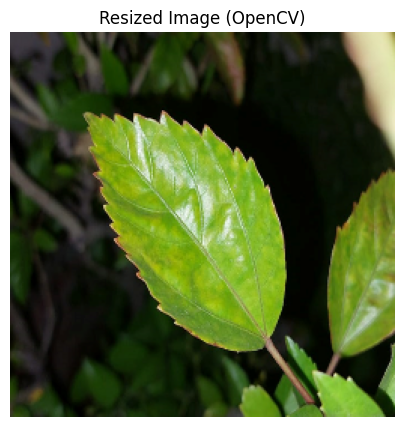

In [7]:
# Resize the image using PIL
try:
    resized_image = image1.resize((256, 256))
    plt.figure(figsize=(5, 5))
    plt.imshow(resized_image)
    plt.title('Resized Image (PIL)')
    plt.axis('off')
    plt.show()

    # Resize the image using OpenCV
    fixed_size = (256, 256)
    img = cv2.resize(image, fixed_size)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR to RGB for displaying correctly
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title('Resized Image (OpenCV)')
    plt.axis('off')
    plt.show()
except NameError:
    print("Error: The image might not have been loaded.  Please ensure '1.jpeg' is present and run the loading cell first.")
except FileNotFoundError:
    print("Error: The image file '1.jpeg' was not found.  Make sure it is in the current directory.")

- c. 转换为灰度

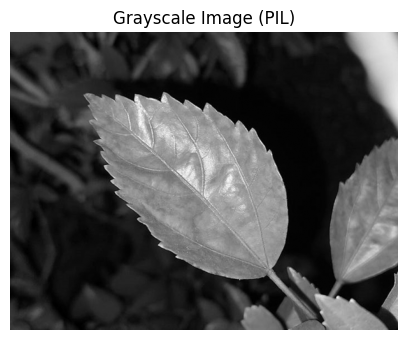

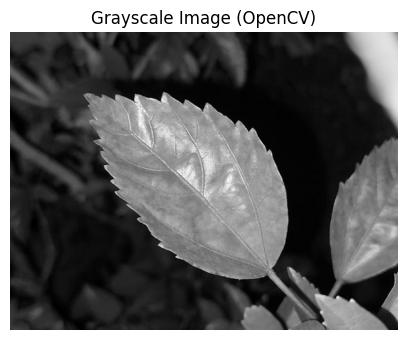

In [8]:
# Convert image to grayscale using PIL
try:
    gray_image_pil = image1.convert('L')
    plt.figure(figsize=(5, 5))
    plt.imshow(gray_image_pil, cmap='gray')
    plt.title('Grayscale Image (PIL)')
    plt.axis('off')
    plt.show()

    # Convert image to grayscale using OpenCV
    gray_image_cv = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(5, 5))
    plt.imshow(gray_image_cv, cmap='gray')
    plt.title('Grayscale Image (OpenCV)')
    plt.axis('off')
    plt.show()
except NameError:
    print("Error: The image might not have been loaded.  Please ensure '1.jpeg' is present and run the loading cell first.")
except FileNotFoundError:
    print("Error: The image file '1.jpeg' was not found.  Make sure it is in the current directory.")

- d. 归一化

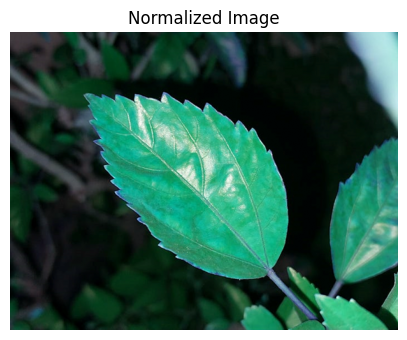

In [9]:
# Convert image to a NumPy array and normalize
try:
    image_array = np.array(image)
    normalized_image = image_array / 255.0

    plt.figure(figsize=(5, 5))
    plt.imshow(normalized_image)
    plt.title('Normalized Image')
    plt.axis('off')
    plt.show()
except NameError:
    print("Error: The image might not have been loaded.  Please ensure '1.jpeg' is present and run the loading cell first.")
except FileNotFoundError:
    print("Error: The image file '1.jpeg' was not found.  Make sure it is in the current directory.")

## 4. 高级图像处理技术

- a. 边缘检测

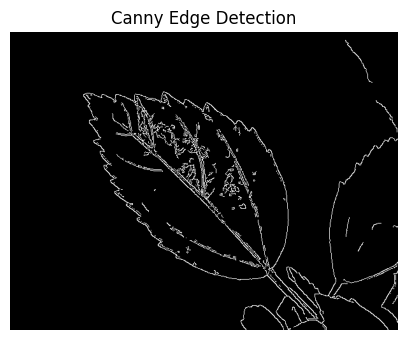

In [10]:
# Apply Canny edge detection
try:
    edges = cv2.Canny(gray_image_cv, 100, 200)
    plt.figure(figsize=(5, 5))
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')
    plt.show()
except NameError:
    print("Error: The image might not have been loaded.  Please ensure '1.jpeg' is present and run the loading cell first.")
except FileNotFoundError:
    print("Error: The image file '1.jpeg' was not found.  Make sure it is in the current directory.")

- b. 图像滤波

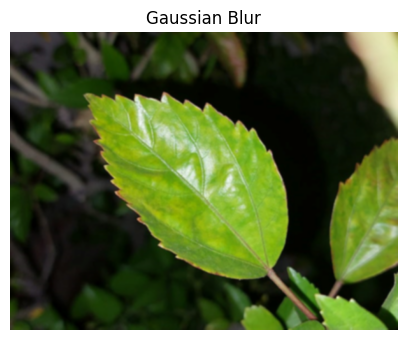

In [11]:
# Apply Gaussian blur
try:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blurred_image = cv2.GaussianBlur(np.array(rgb_image), (5, 5), 0)
    plt.figure(figsize=(5, 5))
    plt.imshow(blurred_image)
    plt.title('Gaussian Blur')
    plt.axis('off')
    plt.show()
except NameError:
    print("Error: The image might not have been loaded.  Please ensure '1.jpeg' is present and run the loading cell first.")
except FileNotFoundError:
    print("Error: The image file '1.jpeg' was not found.  Make sure it is in the current directory.")

- c. 直方图均衡

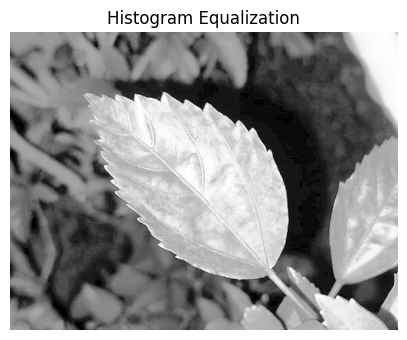

In [12]:
# Equalize the histogram of the grayscale image
try:
    equalized_image = cv2.equalizeHist(gray_image_cv)
    plt.figure(figsize=(5, 5))
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Histogram Equalization')
    plt.axis('off')
    plt.show()
except NameError:
    print("Error: The image might not have been loaded.  Please ensure '1.jpeg' is present and run the loading cell first.")
except FileNotFoundError:
    print("Error: The image file '1.jpeg' was not found.  Make sure it is in the current directory.")